# Import Library dan mount drive

In [1]:
# import library
# from sklearn.datasets import load_iris
import pandas as pd
import seaborn as sns
import os
import numpy as np
import re

In [2]:
# # mount google drive
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# os.chdir(r'/content/drive/MyDrive/kuliah/KK/Tutor KK')

# Load Dataset

In [2]:
# melakukan load dari csv ke dalam bentuk pandas dataframe

dataset_path = 'dataset/keparahan_2_train1_download.csv'
df = pd.read_csv(dataset_path)


In [4]:
df

,No Document,title,Description,USD,IDR,persen,inflasi
0,0,Masih Berani Kritik Ekonomi RI? Luhut: Datangi...,\-\n\nMenteri Koordinator Bidang Kemaritiman d...,0.000000e+00,0.000000e+00,2.97,0
1,1,"Ekspor Lesu, Neraca Dagang RI 2019 Masih Tekor...",\- Neraca dagang Indonesia sepanjang 2019 terc...,3.200000e+09,0.000000e+00,0.00,0
2,2,Neraca Perdagangan Januari Diramalkan Surplus,\- Setelah berhasil mencatatkan surplus disepa...,2.330000e+08,0.000000e+00,8.58,0
3,3,"Tak Cuma Apel dan Jeruk, Laptop dari China Jug...",\- Total impor Indonesia sepanjang November 20...,1.534000e+10,0.000000e+00,9.24,0
4,4,Toko Kelontong Siap-siap Tinggal Nama Kalau Ng...,"\-\n\nUsaha Mikro, Kecil, dan Menengah (UMKM) ...",0.000000e+00,0.000000e+00,0.00,0
...,...,...,...,...,...,...,...
1557,1557,"Ekspor RI Turun 5,49% Jadi US$ 76,41 Miliar",\-\n\nBadan Pusat Statistik (BPS) mencatat nil...,1.203000e+10,0.000000e+00,15.09,0
1558,1558,Ancaman Krisis di Afghanistan: Mata Uang Tak B...,\-\n\nPemerintah baru yang dipimpin Taliban di...,9.000000e+09,1.290000e+14,0.00,1
1559,1559,"Marak Impor Baja dan Tekstil, Luhut: Mematikan...",\-\n\nMenteri Koordinator Kemaritiman dan Inve...,0.000000e+00,0.000000e+00,0.00,0
1560,1560,Erick Thohir Beberkan Peran Himbara ke Pertumb...,\-\n\nLaporan BPS mencatat pertumbuhan ekonomi...,0.000000e+00,3.700000e+14,7.00,0


# Data Description dan analisa

In [6]:
# melihat tipe dari tiap kolom di dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1562 entries, 0 to 1561
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   No Document  1562 non-null   int64  
 1   title        1562 non-null   object 
 2   Description  1562 non-null   object 
 3   USD          1562 non-null   float64
 4   IDR          1562 non-null   float64
 5   persen       1562 non-null   float64
 6   inflasi      1562 non-null   int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 85.5+ KB


In [7]:
# melihat persebaran data dari setiap kolom, seperti variance dan std
df.describe()

,No Document,USD,IDR,persen,inflasi
count,1562.000000,1.562000e+03,1.562000e+03,1.562000e+03,1562.000000
mean,780.500000,9.087080e+10,2.004171e+13,2.317562e+06,0.086428
std,451.054875,2.630510e+12,1.054244e+14,9.159422e+07,0.281085
min,0.000000,0.000000e+00,0.000000e+00,-1.847000e+01,0.000000
25%,390.250000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
50%,780.500000,0.000000e+00,0.000000e+00,1.770000e+00,0.000000
75%,1170.750000,1.550000e+08,0.000000e+00,9.475000e+00,0.000000
max,1561.000000,1.000000e+14,9.222000e+14,3.620000e+09,1.000000


In [8]:
# melihat jumlah missing value
df.isna().sum()

No Document    0
title          0
Description    0
USD            0
IDR            0
persen         0
inflasi        0
dtype: int64

In [10]:
# melihat data yang memiliki missing value
df[df.isna().any(axis=1)]

,No Document,title,Description,USD,IDR,persen,inflasi


In [11]:
# Data Cleansing
df['USD'] = [re.sub("[^0-9]", "", str(USD)) if (re.sub("[^0-9]", "", str(USD)) != '') else 1 for USD in df['USD']]
df['USD'] = df['USD'].astype('int64')

df['IDR'] = [re.sub("[^0-9]", "", str(IDR)) if (re.sub("[^0-9]", "", str(IDR)) != '') else 1 for IDR in df['IDR']]
df['IDR'] = df['IDR'].astype('int64')

# df['persen'] = [re.sub("[^0-9]", "", str(persen)) if (re.sub("[^0-9]", "", str(persen)) != '') else 1 for persen in df['persen']]
# df['persen'] = df['persen'].astype('int64')

df['inflasi'] = [re.sub("[^0-9]", "", str(inflasi)) if (re.sub("[^0-9]", "", str(inflasi)) != '') else 1 for inflasi in df['inflasi']]
df['inflasi'] = df['inflasi'].astype('int64')
# df_rest = df_rest.replace({',': '.'}, regex=True)

df.head()
# df_rest.to_csv('coba.csv')
# df_rest.to_excel('coba.xlsx', index=None)

,No Document,title,Description,USD,IDR,persen,inflasi
0,0,Masih Berani Kritik Ekonomi RI? Luhut: Datangi...,\-\n\nMenteri Koordinator Bidang Kemaritiman d...,0,0,2.97,0
1,1,"Ekspor Lesu, Neraca Dagang RI 2019 Masih Tekor...",\- Neraca dagang Indonesia sepanjang 2019 terc...,32000000000,0,0.00,0
2,2,Neraca Perdagangan Januari Diramalkan Surplus,\- Setelah berhasil mencatatkan surplus disepa...,2330000000,0,8.58,0
3,3,"Tak Cuma Apel dan Jeruk, Laptop dari China Jug...",\- Total impor Indonesia sepanjang November 20...,153400000000,0,9.24,0
4,4,Toko Kelontong Siap-siap Tinggal Nama Kalau Ng...,"\-\n\nUsaha Mikro, Kecil, dan Menengah (UMKM) ...",0,0,0.00,0


In [12]:
# Kondisi Gabungan 
document=[]
keparahanValues = []
for i in range (0,len(df)):
  keparahan1=''
  # if(pesawat==1):
  #     print('masuk1')
  #     keparahan1='parah'

  USD=df.iloc[i,3]
  IDR=df.iloc[i,4]
  persen=df.iloc[i,5]
  inflasi=df.iloc[i,6]
  # print(USD)

  # USD
  if(USD==0 or USD<=100000000 ):
    keparahanUSD=1
  
  elif(USD>100000000 or USD<=1000000000 ):
    keparahanUSD=2
  
  elif(USD>100000000 ):
    keparahanUSD=3
  
  # IDR
  if(IDR==0 or IDR<=100000000 ):
    keparahanIDR=1
  
  elif(IDR>100000000 or IDR<=1000000000 ):
    keparahanIDR=2
  
  elif(IDR>100000000 ):
    keparahanIDR=3
  
  # PERSEN
  if(persen==0 or persen<=5 ):
    keparahanPERSEN=1
  
  elif(persen>5 or persen<=10 ):
    keparahanPERSEN=2
  
  elif(persen>10 ):
    keparahanPERSEN=3
  
  # INFLASI 
  if(inflasi==0 ):
    keparahanINFLASI=1
  else:
    keparahanINFLASI=3


  # gabung USD IDR PERSEN
  if(keparahanUSD==1 and keparahanIDR==1 and keparahanPERSEN==1 ):
    keparahan3=1 
  if(keparahanUSD==2 and keparahanIDR==1 and keparahanPERSEN==1 ):
    keparahan3=2
  if(keparahanUSD==3 and keparahanIDR==1 and keparahanPERSEN==1 ):
    keparahan3=3
  if(keparahanUSD==1 and keparahanIDR==2 and keparahanPERSEN==1 ):
    keparahan3=2
  if(keparahanUSD==2 and keparahanIDR==2 and keparahanPERSEN==1 ):
    keparahan3=2
  if(keparahanUSD==3 and keparahanIDR==2 and keparahanPERSEN==1 ):
    keparahan3=3
  if(keparahanUSD==1 and keparahanIDR==3 and keparahanPERSEN==1 ):
    keparahan3=3
  if(keparahanUSD==2 and keparahanIDR==3 and keparahanPERSEN==1 ):
    keparahan3=3
  if(keparahanUSD==3 and keparahanIDR==3 and keparahanPERSEN==1 ):
    keparahan3=3

  if(keparahanUSD==1 and keparahanIDR==1 and keparahanPERSEN==2 ):
    keparahan3=2
  if(keparahanUSD==2 and keparahanIDR==1 and keparahanPERSEN==2 ):
    keparahan3=2
  if(keparahanUSD==3 and keparahanIDR==1 and keparahanPERSEN==2 ):
    keparahan3=3
  if(keparahanUSD==1 and keparahanIDR==2 and keparahanPERSEN==2 ):
    keparahan3=2
  if(keparahanUSD==2 and keparahanIDR==2 and keparahanPERSEN==2 ):
    keparahan3=2
  if(keparahanUSD==3 and keparahanIDR==2 and keparahanPERSEN==2 ):
    keparahan3=3
  if(keparahanUSD==1 and keparahanIDR==3 and keparahanPERSEN==2 ):
    keparahan3=3
  if(keparahanUSD==2 and keparahanIDR==3 and keparahanPERSEN==2 ):
    keparahan3=3
  if(keparahanUSD==3 and keparahanIDR==3 and keparahanPERSEN==2 ):
    keparahan3=3

  if(keparahanUSD==1 and keparahanIDR==1 and keparahanPERSEN==3 ):
    keparahan3=3
  if(keparahanUSD==2 and keparahanIDR==1 and keparahanPERSEN==3 ):
    keparahan3=3
  if(keparahanUSD==3 and keparahanIDR==1 and keparahanPERSEN==3 ):
    keparahan3=3
  if(keparahanUSD==1 and keparahanIDR==2 and keparahanPERSEN==3 ):
    keparahan3=3
  if(keparahanUSD==2 and keparahanIDR==2 and keparahanPERSEN==3 ):
    keparahan3=3
  if(keparahanUSD==3 and keparahanIDR==2 and keparahanPERSEN==3 ):
    keparahan3=3
  if(keparahanUSD==1 and keparahanIDR==3 and keparahanPERSEN==3 ):
    keparahan3=3
  if(keparahanUSD==2 and keparahanIDR==3 and keparahanPERSEN==3 ):
    keparahan3=3
  if(keparahanUSD==3 and keparahanIDR==3 and keparahanPERSEN==3 ):
    keparahan3=3

  # gabung USD IDR PERSEN
  if(keparahan3==1 and keparahanINFLASI==1):
    # keparahanTotal=1    
    keparahanTotal="rendah"  
  if(keparahan3==1 and keparahanINFLASI==3):
    # keparahanTotal=3
    keparahanTotal="parah"
  if(keparahan3==2 and keparahanINFLASI==1):
    # keparahanTotal=2    
    keparahanTotal="sedang"  
  if(keparahan3==2 and keparahanINFLASI==3):
    # keparahanTotal=3
    keparahanTotal="parah"
  if(keparahan3==3 and keparahanINFLASI==1):
    # keparahanTotal=3    
    keparahanTotal="parah"    
  if(keparahan3==3 and keparahanINFLASI==3):
    # keparahanTotal=3
    keparahanTotal="parah"
  
  keparahanValues.append(keparahanTotal)

In [14]:
df['keparahan'] = keparahanValues
df.head()

,No Document,title,Description,USD,IDR,persen,inflasi,keparahan
0,0,Masih Berani Kritik Ekonomi RI? Luhut: Datangi...,\-\n\nMenteri Koordinator Bidang Kemaritiman d...,0,0,2.97,0,rendah
1,1,"Ekspor Lesu, Neraca Dagang RI 2019 Masih Tekor...",\- Neraca dagang Indonesia sepanjang 2019 terc...,32000000000,0,0.00,0,sedang
2,2,Neraca Perdagangan Januari Diramalkan Surplus,\- Setelah berhasil mencatatkan surplus disepa...,2330000000,0,8.58,0,sedang
3,3,"Tak Cuma Apel dan Jeruk, Laptop dari China Jug...",\- Total impor Indonesia sepanjang November 20...,153400000000,0,9.24,0,sedang
4,4,Toko Kelontong Siap-siap Tinggal Nama Kalau Ng...,"\-\n\nUsaha Mikro, Kecil, dan Menengah (UMKM) ...",0,0,0.00,0,rendah


In [15]:
# melihat jumlah setiap kelas di kolom target
df.keparahan.value_counts()

sedang    760
rendah    667
parah     135
Name: keparahan, dtype: int64

In [16]:
# labels=['Iris-virginica','Iris-versicolor', 'Iris-setosa ']
labels=['rendah','sedang', 'parah']

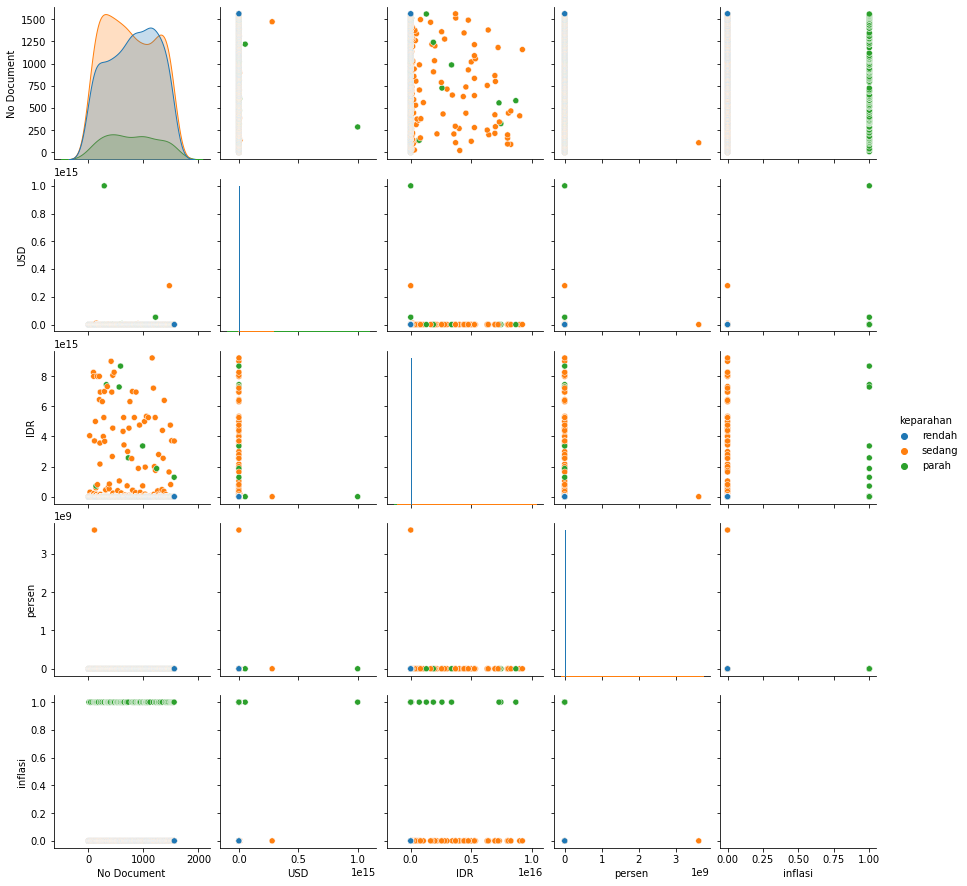

In [17]:
# distribusi data dari satu kolom ke kolom yang lain
# sns.pairplot(df,hue="Species")
sns.pairplot(df,hue="keparahan")

# PraProses


`Ini kalian bisa melakukan pra proses menyesuaikan kondisi data.
Beberapa masalah yang harus diatasi:
Missing Value
Extreme Value (outlier)
Encoding atribut kateogrikal
Normalisasi
Feature engineering
dll.
Intinya menyesuaikan problem!`

## Handling Missing Value

In [18]:
df.mean()

C:\Users\ryand\AppData\Local\Temp\ipykernel_17348\3698961737.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


No Document    7.805000e+02
USD            9.087080e+11
IDR            2.004171e+14
persen         2.317562e+06
inflasi        8.642766e-02
dtype: float64

In [19]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html
df.fillna(df.mean(),inplace=True)

C:\Users\ryand\AppData\Local\Temp\ipykernel_17348\3256242331.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(),inplace=True)


In [20]:
df.isna().sum()

No Document    0
title          0
Description    0
USD            0
IDR            0
persen         0
inflasi        0
keparahan      0
dtype: int64

## Label Encoder

In [21]:
# label encoder
# dictionary buat mappingnya
dic = {"rendah":1, "sedang":2,'parah':3}

# dimapping ke kolom baru 
df['Target']=df.keparahan.replace(dic)

In [22]:
df.head(5)

,No Document,title,Description,USD,IDR,persen,inflasi,keparahan,Target
0,0,Masih Berani Kritik Ekonomi RI? Luhut: Datangi...,\-\n\nMenteri Koordinator Bidang Kemaritiman d...,0,0,2.97,0,rendah,1
1,1,"Ekspor Lesu, Neraca Dagang RI 2019 Masih Tekor...",\- Neraca dagang Indonesia sepanjang 2019 terc...,32000000000,0,0.00,0,sedang,2
2,2,Neraca Perdagangan Januari Diramalkan Surplus,\- Setelah berhasil mencatatkan surplus disepa...,2330000000,0,8.58,0,sedang,2
3,3,"Tak Cuma Apel dan Jeruk, Laptop dari China Jug...",\- Total impor Indonesia sepanjang November 20...,153400000000,0,9.24,0,sedang,2
4,4,Toko Kelontong Siap-siap Tinggal Nama Kalau Ng...,"\-\n\nUsaha Mikro, Kecil, dan Menengah (UMKM) ...",0,0,0.00,0,rendah,1


In [23]:
df = df.drop(df.columns[7], axis=1)
df.head(5)

,No Document,title,Description,USD,IDR,persen,inflasi,Target
0,0,Masih Berani Kritik Ekonomi RI? Luhut: Datangi...,\-\n\nMenteri Koordinator Bidang Kemaritiman d...,0,0,2.97,0,1
1,1,"Ekspor Lesu, Neraca Dagang RI 2019 Masih Tekor...",\- Neraca dagang Indonesia sepanjang 2019 terc...,32000000000,0,0.00,0,2
2,2,Neraca Perdagangan Januari Diramalkan Surplus,\- Setelah berhasil mencatatkan surplus disepa...,2330000000,0,8.58,0,2
3,3,"Tak Cuma Apel dan Jeruk, Laptop dari China Jug...",\- Total impor Indonesia sepanjang November 20...,153400000000,0,9.24,0,2
4,4,Toko Kelontong Siap-siap Tinggal Nama Kalau Ng...,"\-\n\nUsaha Mikro, Kecil, dan Menengah (UMKM) ...",0,0,0.00,0,1


# Train Test Split


In [24]:
# X adalah kolom attribut tanpa kolom target
X=df.iloc[:,3:-1]
X.head(2)

,USD,IDR,persen,inflasi
0,0,0,2.97,0
1,32000000000,0,0.00,0


In [25]:
# y adalah kolom yang hanya target
y=df.iloc[:,-1]
y.head(2)

0    1
1    2
Name: Target, dtype: int64

In [26]:
# untuk memisahkan data train dan test -> https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
from sklearn.model_selection import train_test_split

# param stratify : data displit secara stratified -> https://scikit-learn.org/stable/modules/cross_validation.html#stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=77,stratify=y) 
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [27]:
# Check the shape of X_train and X_test
X_train.shape, X_test.shape

((1093, 4), (469, 4))

# Normalisasi

In [28]:
# untuk mengatasi perbedaan nilai antar kolom -> https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) #tanpa target
X_test_scaled = scaler.transform(X_test)

# Evaluation

In [29]:
# function untuk melakukan perhitungan seluruh metric evaluasi -> https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
def get_metrics(true_labels, predicted_labels):
    acc=np.round(accuracy_score(true_labels, predicted_labels),4)
    prec=np.round(precision_score(true_labels, predicted_labels,average='weighted'),4)
    recall=np.round(recall_score(true_labels, predicted_labels,average='weighted'),4)
    f1=np.round(f1_score(true_labels, predicted_labels,average='weighted'),4)
    return [acc,prec,recall,f1]

# Model

In [30]:
kolom=['Model','Acc','Precision','Recall','F1']
HASIL_AKHIR=pd.DataFrame(columns=kolom)

## K-NN

In [100]:
# fit model KNN -> https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier() # default nilai k = 5 , leaf_size 30
# knn = KNeighborsClassifier(metric='minkowski') # default nilai k = 5 , leaf_size 30
# knn_balltree = KNeighborsClassifier(algorithm='ball_tree') 
# knn_kdtree = KNeighborsClassifier(algorithm='kd_tree') 
# knn_brute = KNeighborsClassifier(algorithm='brute') 




knn.fit(X_train, y_train)
# knn_balltree.fit(X_train, y_train)
# knn_kdtree.fit(X_train, y_train)
# knn_brute.fit(X_train, y_train)

KNeighborsClassifier()

In [32]:
# import joblib
# joblib.dump(knn,"modelklasifikasi.pkl")

In [99]:
# predict model ke data test
y_pred_knn=knn.predict(X_test)
# y_pred_knn=knn_balltree.predict(X_test)
# y_pred_knn=knn_kdtree.predict(X_test)
# y_pred_knn=knn_brute.predict(X_test)
y_pred_knn

array([1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2,
       2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2,
       2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 3, 2, 1, 2, 2, 3, 1, 2, 2, 3, 1, 2, 1, 1, 1, 2,
       1, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 1, 3, 2, 2,
       3, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 3, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 3, 1, 2, 2, 1, 2, 1, 2,
       2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2,
       2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 3, 2, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1,
       2, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 1, 1, 2, 3, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2, 1,
       1, 2, 2, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 3, 1, 1, 2, 3, 1, 1, 1, 3,
       1, 3, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 3,
       2, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1,

In [94]:
print(knn.score(X_test,y_test))

0.9360341151385928


In [96]:
# Check accuracy score
print('Model accuracy score : {0:0.4f}'.format(accuracy_score(y_test, y_pred_knn)))

Model accuracy score : 0.9360


In [77]:
# evaluation score untuk model KNN
get_metrics(y_test,y_pred_knn)

[0.936, 0.9368, 0.936, 0.9301]

In [42]:
y_pred_train = knn.predict(X_train)
y_pred_train

array([2, 2, 2, ..., 2, 1, 1], dtype=int64)

In [43]:
# Print the scores on training and test set
print('Training set score: {:.4f}'.format(knn.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(knn.score(X_test, y_test)))

Training set score: 0.9460
Test set score: 0.9360


In [44]:
# Check class distribution in test set
print("y_test: Class")
y_test.value_counts()

y_test: Class


2    228
1    200
3     41
Name: Target, dtype: int64

In [46]:
print("y_train: Class")
y_train.value_counts()

y_train: Class


2    532
1    467
3     94
Name: Target, dtype: int64

In [48]:
hasil=['knn']+get_metrics(y_test,y_pred_knn)
hasil

['knn', 0.936, 0.9368, 0.936, 0.9301]

In [49]:
# concat ke dataframe perbandingan score
HASIL_AKHIR=pd.concat([HASIL_AKHIR,pd.DataFrame([hasil],columns=kolom)])  
HASIL_AKHIR

,Model,Acc,Precision,Recall,F1
0,knn,0.936,0.9368,0.936,0.9301


## SVM

In [40]:
# fit model SVM -> https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train, y_train)

SVC()

In [41]:
# predict model ke data test
y_pred_svm=clf.predict(X_test)

In [42]:
# evaluation score untuk model SVM
get_metrics(y_test,y_pred_svm)

c:\Users\ryand\Documents\TA\venv\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[0.4861, 0.2363, 0.4861, 0.318]

In [43]:
hasil=['svm']+get_metrics(y_test,y_pred_svm)

c:\Users\ryand\Documents\TA\venv\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [51]:
# concat ke dataframe perbandingan score
HASIL_AKHIR=pd.concat([HASIL_AKHIR,pd.DataFrame([hasil],columns=kolom)])

## Random Forest

In [45]:
# fit model Random Forest -> https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [46]:
# predict model ke data test
y_pred_rf=rf.predict(X_test)

In [47]:
# evaluation score untuk model Random Forest
get_metrics(y_test,y_pred_rf)

[1.0, 1.0, 1.0, 1.0]

In [48]:
hasil=['RF']+get_metrics(y_test,y_pred_rf)

In [49]:
# concat ke dataframe perbandingan score
HASIL_AKHIR=pd.concat([HASIL_AKHIR,pd.DataFrame([hasil],columns=kolom)])

## XGBoost

In [50]:
# run di local -> pip install xgboost

# fit model XGBoost -> https://xgboost.readthedocs.io/en/latest/
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
# predict model ke data test
y_pred_xgb=xgb.predict(X_test)

In [ ]:
# evaluation score untuk model XGBoost
get_metrics(y_test,y_pred_xgb)

[0.9467, 0.9485, 0.9467, 0.9466]

In [ ]:
hasil=['XGB']+get_metrics(y_test,y_pred_xgb)

In [ ]:
# concat ke dataframe perbandingan score
HASIL_AKHIR=pd.concat([HASIL_AKHIR,pd.DataFrame([hasil],columns=kolom)])

## MLP

In [ ]:
# fit model MLP -> https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(max_iter=3000)
mlp.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=3000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
# predict model ke data test
y_pred_mlp=mlp.predict(X_test)

In [ ]:
# evaluation score untuk model MLP
get_metrics(y_test,y_pred_mlp)

[0.9467, 0.9467, 0.9467, 0.9467]

In [ ]:
hasil=['mlp']+get_metrics(y_test,y_pred_mlp)

In [ ]:
# concat ke dataframe perbandingan score
HASIL_AKHIR=pd.concat([HASIL_AKHIR,pd.DataFrame([hasil],columns=kolom)])

# Decision Tree

In [ ]:
# fit model Decision Tree -> https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
# predict model ke data test
y_pred_dt=dt.predict(X_test)

In [ ]:
# evaluation score untuk model Decision Tree
get_metrics(y_test,y_pred_dt)

[0.9333, 0.9338, 0.9333, 0.9333]

In [ ]:
hasil=['dt']+get_metrics(y_test,y_pred_dt)

In [ ]:
# concat ke dataframe perbandingan score
HASIL_AKHIR=pd.concat([HASIL_AKHIR,pd.DataFrame([hasil],columns=kolom)])

## Hasil Akhir

In [ ]:
# dataframe perbandingan model
from IPython.display import display 
print("Dicky Maulana Rozi-05111740000083-KELAS KK D")
display(HASIL_AKHIR)
print("Hasil terbaik didapatkan dari model dengan svm dan knm karena presisi paling tinggi")

Dicky Maulana Rozi-05111740000083-KELAS KK D


,Model,Acc,Precision,Recall,F1
0,knn,0.9733,0.9733,0.9733,0.9733
0,svm,0.9733,0.9733,0.9733,0.9733
0,RF,0.9467,0.9485,0.9467,0.9466
0,XGB,0.9467,0.9485,0.9467,0.9466
0,mlp,0.9467,0.9467,0.9467,0.9467
0,dt,0.9333,0.9338,0.9333,0.9333


Hasil terbaik didapatkan dari model dengan svm dan knm karena presisi paling tinggi


# CrossVal

In [54]:
# berikut penjelasan link https://scikit-learn.org/stable/modules/cross_validation.html
from sklearn.model_selection import cross_validate
X_scaled=StandardScaler().fit_transform(X)
knn_cv = KNeighborsClassifier()
cv_results = cross_validate(knn_cv, X_scaled , y, cv=5)
sorted(cv_results.keys())
cv_results

{'fit_time': array([0.00399137, 0.00099754, 0.00199413, 0.00199771, 0.00099826]),
 'score_time': array([0.01196551, 0.009974  , 0.01595855, 0.01495361, 0.01196742]),
 'test_score': array([0.99680511, 0.99361022, 0.99358974, 0.99358974, 0.99358974])}

In [55]:
cv_results['test_score'].mean()

0.9942369132464979

# Random Search

In [56]:
# berikut penjelasan link https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html
from sklearn.model_selection import RandomizedSearchCV
import sklearn.model_selection as model_selection

In [57]:
# parameter yang ingin diujicoba
param_grid = {
    'bootstrap': [True, False],
    'max_depth': [80, 90, 100, 110, 120],
    'max_features': ['sqrt', 'auto'],
    'min_samples_leaf': [1, 2, 3],
    'n_estimators': [700, 800, 900, 1000, 1100, 1200],
}

In [58]:
# inisiasi model
# clf = RandomForestClassifier()
clf = KNeighborsClassifier()

In [111]:
grid_search = RandomizedSearchCV(clf, param_grid, random_state=77,n_iter=10,cv=2)

In [112]:
# melakukan fit gridsearch
grid_search.fit(X_scaled, y)

ValueError: Invalid parameter 'n_estimators' for estimator KNeighborsClassifier(). Valid parameters are: ['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'].

In [107]:
# parameter grid search terbaik
grid_search.best_params_

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_params_'

In [ ]:
# skor grid serach terbaik
grid_search.best_score_

0.96

# Grid Search

In [113]:
from sklearn.model_selection import GridSearchCV
import sklearn.model_selection as model_selection

In [172]:
# # knn
# k_range = list(range(1, 31))
# print(k_range)
# param_grid = dict(n_neighbors=k_range)

# parameter yang ingin diujicoba
param_grid = {
    'n_neighbors': [3, 5, 7, 11, 19],
    'weights': ['uniform','distance'],
    'metric': ['euclidean','manhattan']
}

In [173]:
# inisiasi model
clf = KNeighborsClassifier()

In [174]:
grid_search = GridSearchCV(clf, param_grid , verbose = 1, cv = 3 , n_jobs = -1)

In [176]:
# melakukan fit gridsearch
grid_search.fit(X_scaled, y)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 11, 19],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [169]:
# parameter grid search terbaik
grid_search.best_params_

{'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}

In [170]:
grid_search.best_estimator_

KNeighborsClassifier(metric='euclidean', n_neighbors=3, weights='distance')

In [171]:
# skor grid serach terbaik
grid_search.best_score_

0.996797332545893

# Confusion Matrix

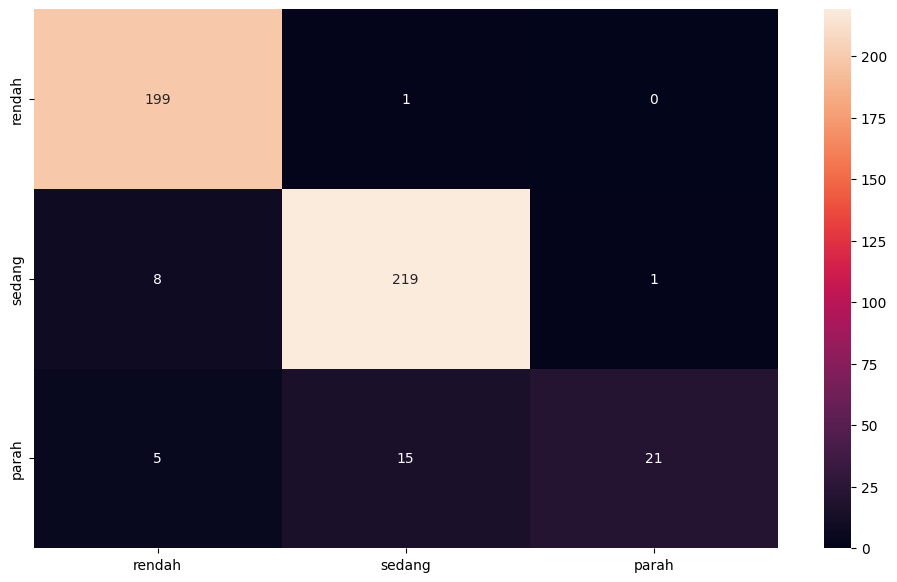

In [40]:
# Confusion Matrix dari model knn sebelumnya
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
conf = confusion_matrix(y_test,y_pred_knn)
cm = pd.DataFrame(
    conf, index = [i for i in labels],
    columns = [i for i in labels]
)
plt.figure(figsize = (12,7))
sns.heatmap(cm, annot=True, fmt="d")
plt.show()

In [41]:
print(classification_report(y_test,y_pred_knn))


              precision    recall  f1-score   support

           1       0.94      0.99      0.97       200
           2       0.93      0.96      0.95       228
           3       0.95      0.51      0.67        41

    accuracy                           0.94       469
   macro avg       0.94      0.82      0.86       469
weighted avg       0.94      0.94      0.93       469

